## Visualize linear pieces and receptive fields at init and after training for various models trained on various datasets

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import math, time


In [3]:
#get data
dataname_all = ['linear', 'spiral', 'shape']
dataloc = f"./data"
from data_prep import loaddata
data_all = []
for k in range(len(dataname_all)):
    _, _, _, test_data = loaddata(dataname_all[k], root=dataloc, batch_size=64, normalize=True, return_data=True)
    data_all.append(test_data)


/n/home00/sumedh/proj1_sparel/results/am226_classproj/data_prep.py:23: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  file = torch.load(datapath)


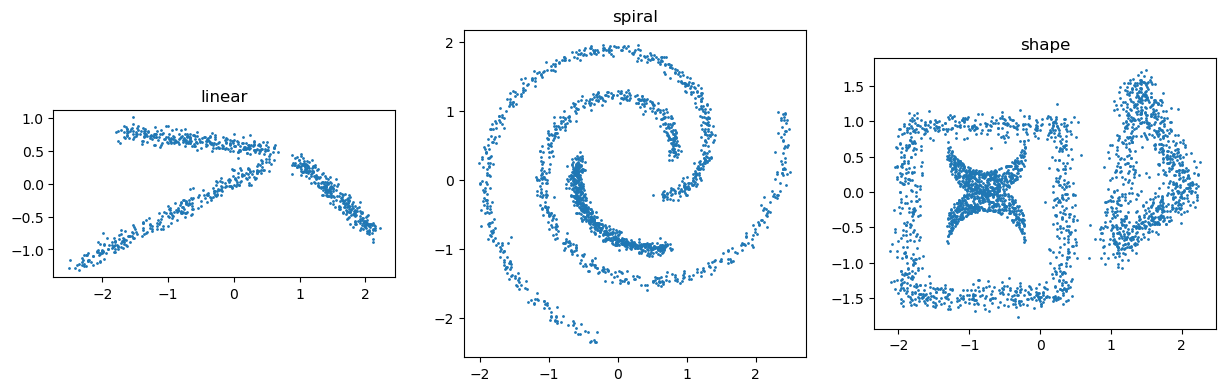

In [5]:
#plot the datasets in 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for k in range(len(dataname_all)):
    axs[k].scatter(data_all[k].data[:, 0], data_all[k].data[:, 1], s=1)
    axs[k].set_title(dataname_all[k])
    axs[k].set_aspect('equal', 'box')
plt.show()

the range [-2,2] should suffice for both x and y axis

In [6]:
#create a meshgrid of points from [-5, 5] in 2D, save as a tensor of size (2, 100*100)
x, y = torch.meshgrid(torch.linspace(-2, 2, 1000), torch.linspace(-2, 2, 1000))
Xmesh = torch.stack([x, y], dim=2).view(-1, 2)

/n/holylabs/LABS/ba_lab/Users/sumedh/conda/envs/spmax/lib/python3.10/site-packages/torch/functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3609.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [11]:
modelsall = {}
modeltypes = ['relu', 'topk', 'sparsemax_lintx', 'sparsemax_dist']
NUMNEURONS = 20
topK = 5 #needed only for topK
dim=2
from models import Net
for i in range(len(dataname_all)):
    for j in range(len(modeltypes)):
        expt_name = modeltypes[j]+"_"+dataname_all[i]+"_"+str(NUMNEURONS)+"neurons"
        model_ij_init = Net(dim, NUMNEURONS,dim, nonlinearity=modeltypes[j], topk=topK)
        model_ij_final = Net(dim, NUMNEURONS,dim, nonlinearity=modeltypes[j], topk=topK)
        state_dict_init = torch.load(f"./experiments/{expt_name}/model_init.pt")
        state_dict_final = torch.load(f"./experiments/{expt_name}/model_final.pt")

        # If the state dict contains a 'model' key, extract it
        if 'model' in state_dict_init:
            state_dict_init = state_dict_init['model']
        if 'model' in state_dict_final:
            state_dict_final = state_dict_final['model']

        model_ij_init.load_state_dict(state_dict_init)
        model_ij_final.load_state_dict(state_dict_final)
        modelsall[expt_name+"_init"] = model_ij_init
        modelsall[expt_name+"_final"] = model_ij_final

/tmp/ipykernel_2743170/1991965702.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict_init = torch.load(f"./experiments/{expt_name}/model_init.pt")
/tmp/ipykerne

In [14]:
from piecesviz import linear_pieces

linpieceall, Rfieldall = {}, {}
for key in modelsall.keys():
    model = modelsall[key]
    model.eval()
    linpiece, Rfield = linear_pieces(model, Xmesh, receptive_fields=True)
    linpieceall[key] = linpiece
    Rfieldall[key] = Rfield
    print(f"{key} done")

relu_linear_20neurons_init done
relu_linear_20neurons_final done
topk_linear_20neurons_init done
topk_linear_20neurons_final done
sparsemax_lintx_linear_20neurons_init done
sparsemax_lintx_linear_20neurons_final done
sparsemax_dist_linear_20neurons_init done
sparsemax_dist_linear_20neurons_final done
relu_spiral_20neurons_init done
relu_spiral_20neurons_final done
topk_spiral_20neurons_init done
topk_spiral_20neurons_final done
sparsemax_lintx_spiral_20neurons_init done
sparsemax_lintx_spiral_20neurons_final done
sparsemax_dist_spiral_20neurons_init done
sparsemax_dist_spiral_20neurons_final done
relu_shape_20neurons_init done
relu_shape_20neurons_final done
topk_shape_20neurons_init done
topk_shape_20neurons_final done
sparsemax_lintx_shape_20neurons_init done
sparsemax_lintx_shape_20neurons_final done
sparsemax_dist_shape_20neurons_init done
sparsemax_dist_shape_20neurons_final done


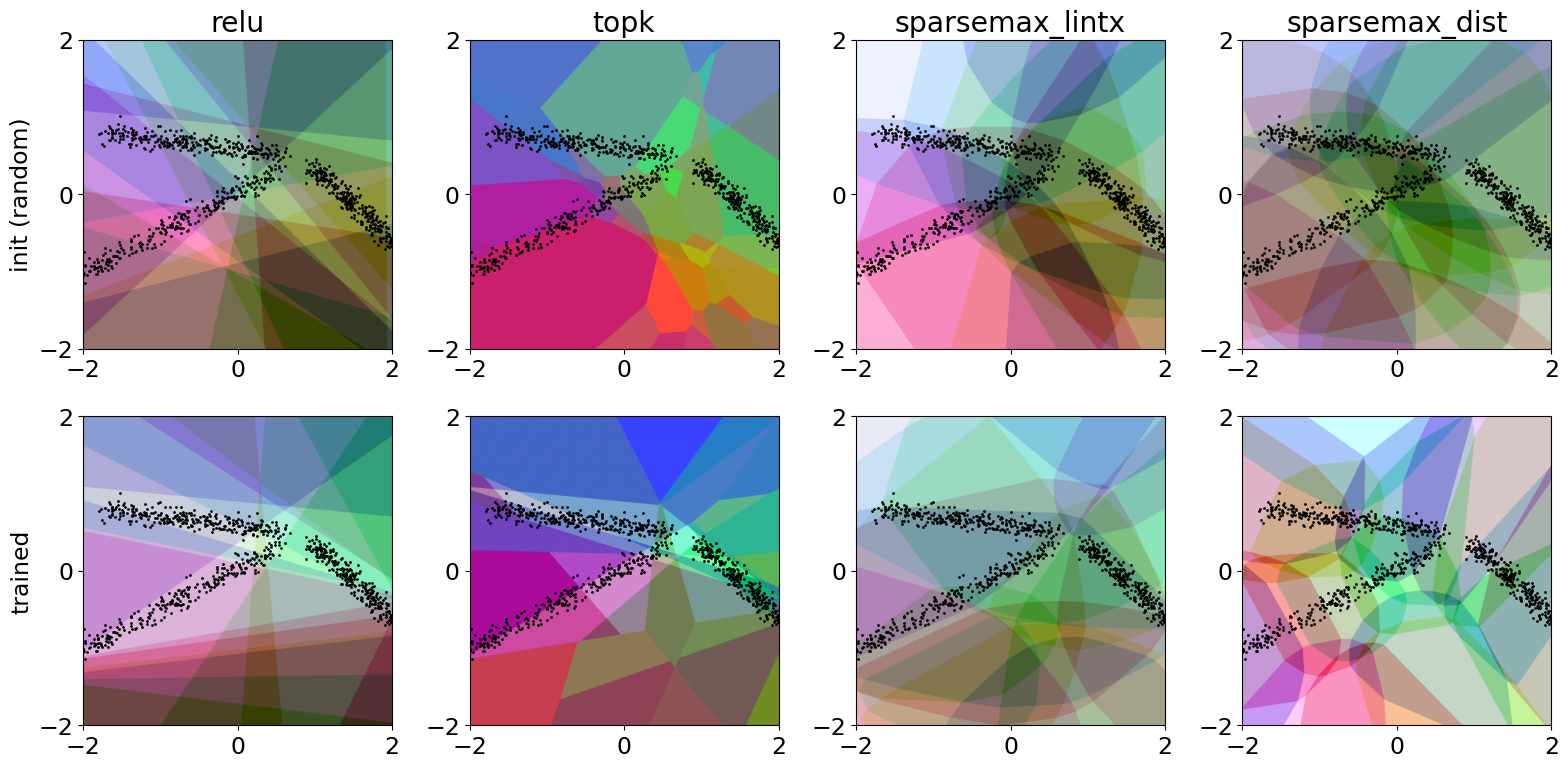

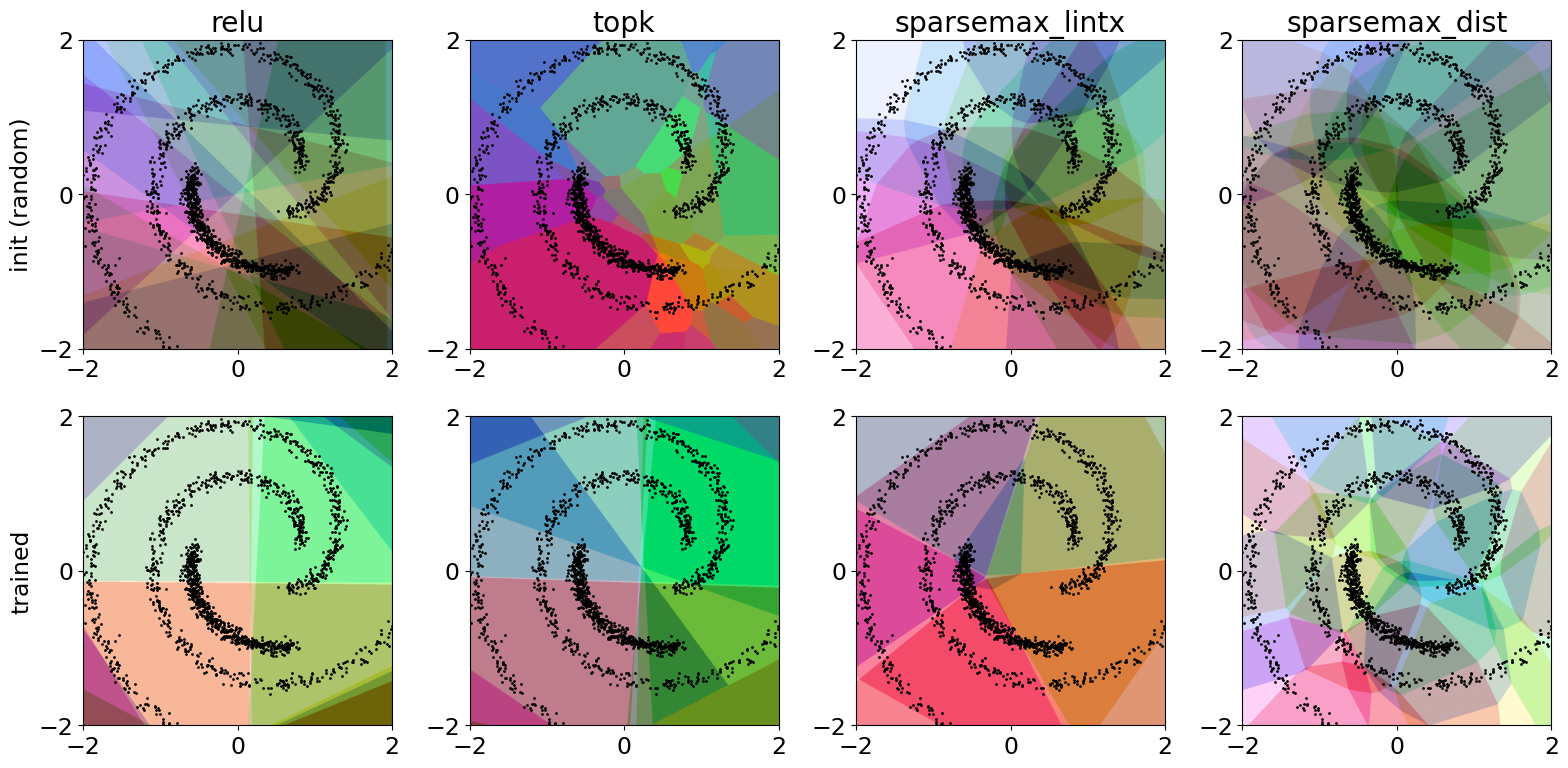

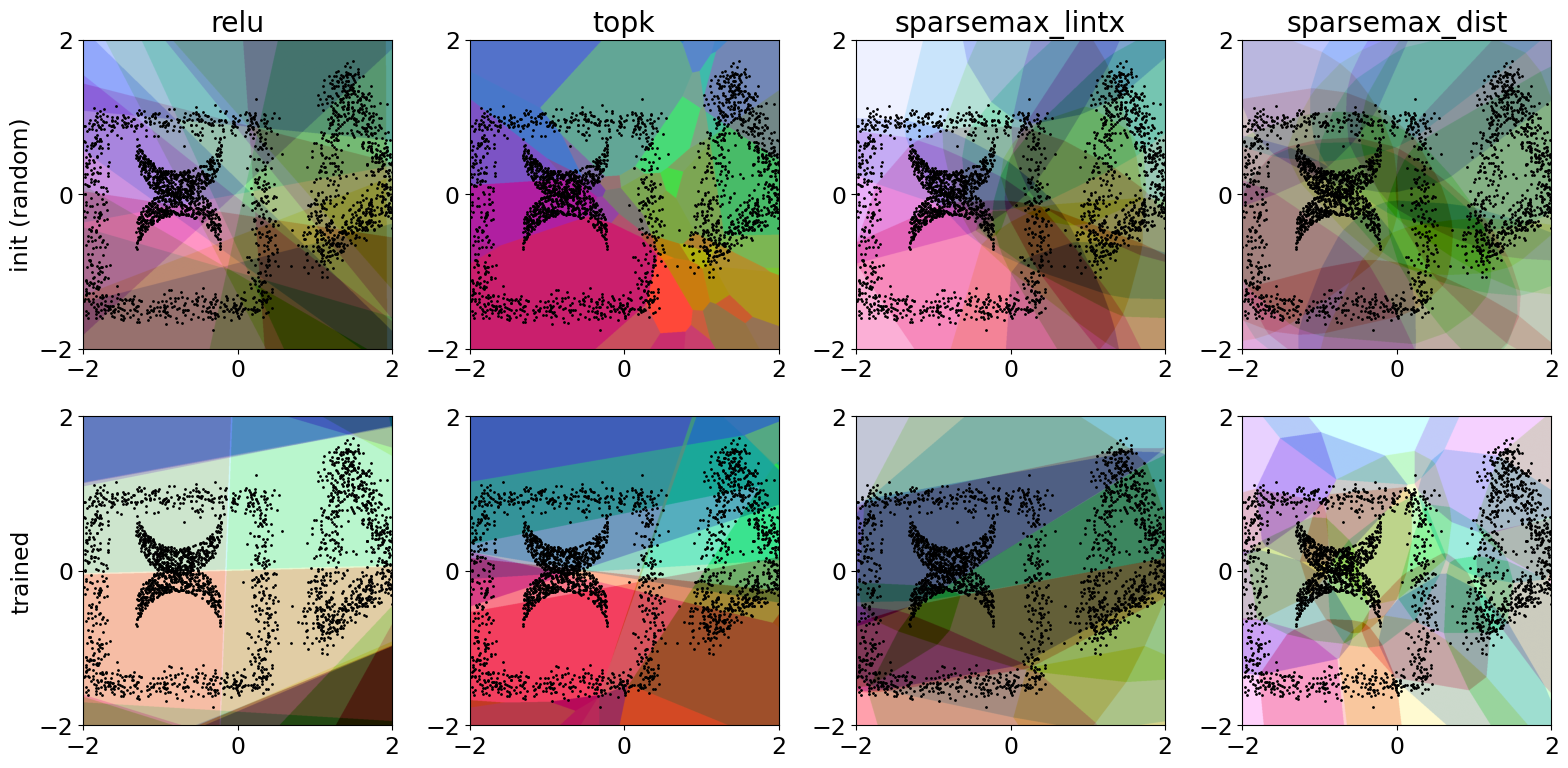

In [ ]:
#visualize linpieceall: use 2 columns one for init and another for final
#also group by dataset (different figures for diff datasets)
plt.rcParams.update({'font.size': 17})
for i in range(len(dataname_all)):
    fig, axs = plt.subplots(2, 4, figsize=(16, 8))
    for j in range(len(modeltypes)):
        key_init = modeltypes[j]+"_"+dataname_all[i]+"_"+str(NUMNEURONS)+"neurons_init"
        key_final = modeltypes[j]+"_"+dataname_all[i]+"_"+str(NUMNEURONS)+"neurons_final"
        for m in range(2):
            axs[m,j].scatter(data_all[i].data[:, 0], data_all[i].data[:, 1], s=1, c='k')
            if m==0:
                axs[0,j].set_title(modeltypes[j])
            axs[m,j].set_aspect('equal', 'box')
            axs[m,j].set_xticks([-2, 0, 2])
            axs[m,j].set_yticks([-2, 0, 2])
        axs[0,j].imshow(linpieceall[key_init].max()-linpieceall[key_init], extent=[-2, 2, -2, 2], origin='lower')
        axs[1,j].imshow(linpieceall[key_final].max()-linpieceall[key_final], extent=[-2, 2, -2, 2], origin='lower')
        if j==0:
            axs[0,0].set_ylabel("init (random)")
            axs[1,0].set_ylabel("trained")
    # fig.suptitle("data=" + dataname_all[i])
    fig.tight_layout()
    
    # plt.savefig("./figures/linpieces_"+dataname_all[i]+".png", dpi=300, bbox_inches='tight')
    plt.show()

In [94]:
# from matplotlib.gridspec import GridSpec
# from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

# plt.rcParams.update({'font.size': 20})

# superfig = plt.figure(figsize=(22, 6))
# outer_grid = GridSpec(1, 4, figure=superfig, wspace=0.1, hspace=0.01)


# i = 0
# for j in range(len(modeltypes)):
#     fig, axs = plt.subplots(4, 5, figsize=(5, 4))
#     key_final = modeltypes[j]+"_"+dataname_all[i]+"_"+str(NUMNEURONS)+"neurons_final"
    
#     for k in range(NUMNEURONS):
#         axs[k//5, k%5].scatter(data_all[i].data[:, 0], data_all[i].data[:, 1], s=1, c='k')
#         axs[k//5, k%5].imshow(Rfieldall[key_final][k].max()-Rfieldall[key_final][k], extent=[-2, 2, -2, 2], origin='lower')
#         axs[k//5, k%5].set_xticks([])
#         axs[k//5, k%5].set_yticks([])
#         axs[k//5, k%5].set_xlim(-2, 2)
#         axs[k//5, k%5].set_ylim(-2, 2)
        
    
#     # fig.tight_layout()
#     # plt.savefig("./figures/Rfields_"+dataname_all[i]+".png", dpi=300, bbox_inches='tight')
#     #remove whitespaces in fig
#     fig.suptitle(modeltypes[j])

#     fig.tight_layout(pad=0.03)

#     fig.subplots_adjust(wspace=0, hspace=0)
#     canvas = FigureCanvas(fig)
#     canvas.draw()
#     image = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')
#     image = image.reshape(canvas.get_width_height()[::-1] + (3,))

#     # Add the image to the superfigure
#     ax = superfig.add_subplot(outer_grid[i, j])
#     ax.imshow(image)
#     ax.axis('off')  # Turn off axes for the embedded figure

#     plt.close(fig)  # Close the individual figure to free memory

# plt.show()

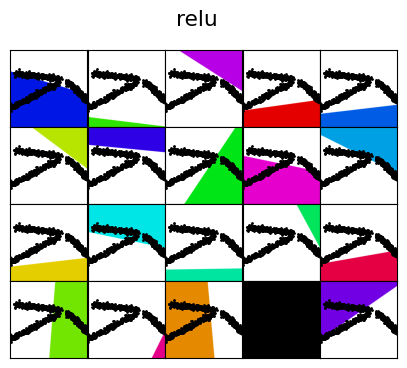

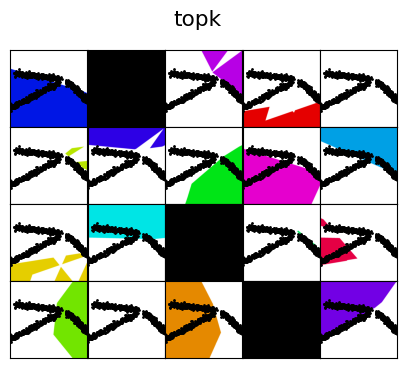

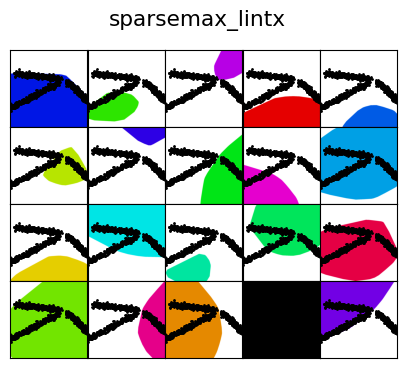

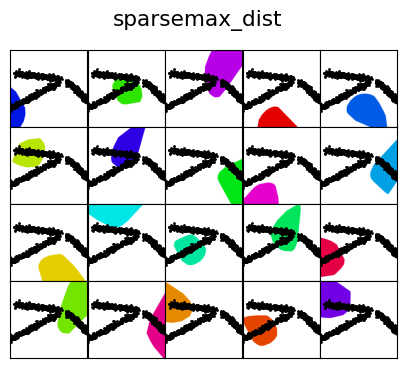

In [91]:
#show only final receptive fields for all models, data in separate figures, each having 4X5 subplots (one per neuron)
plt.rcParams.update({'font.size': 13})
for i in range(1):
    
    for j in range(len(modeltypes)):
        fig, axs = plt.subplots(4, 5, figsize=(5, 4))
        key_final = modeltypes[j]+"_"+dataname_all[i]+"_"+str(NUMNEURONS)+"neurons_final"
        
        for k in range(NUMNEURONS):
            axs[k//5, k%5].scatter(data_all[i].data[:, 0], data_all[i].data[:, 1], s=1, c='k')
            axs[k//5, k%5].imshow(Rfieldall[key_final][k].max()-Rfieldall[key_final][k], extent=[-2, 2, -2, 2], origin='lower')
            axs[k//5, k%5].set_xticks([])
            axs[k//5, k%5].set_yticks([])
            axs[k//5, k%5].set_xlim(-2, 2)
            axs[k//5, k%5].set_ylim(-2, 2)
            
        fig.suptitle(modeltypes[j])
        # fig.tight_layout()
        fig.subplots_adjust(wspace=0, hspace=0)
        # plt.savefig("./figures/Rfields_"+modeltypes[j]+"_"+dataname_all[i]+".png", dpi=300, bbox_inches='tight')
        plt.show()

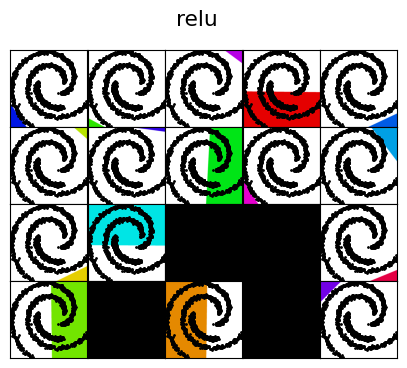

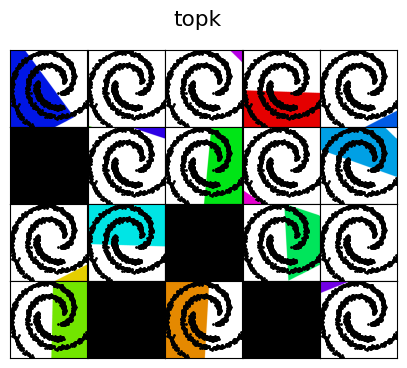

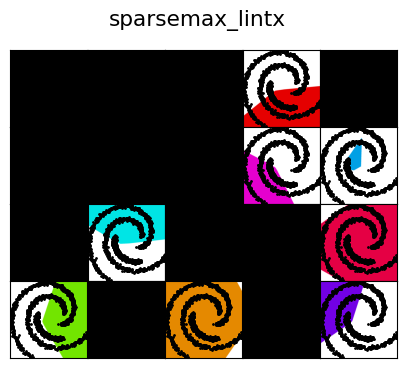

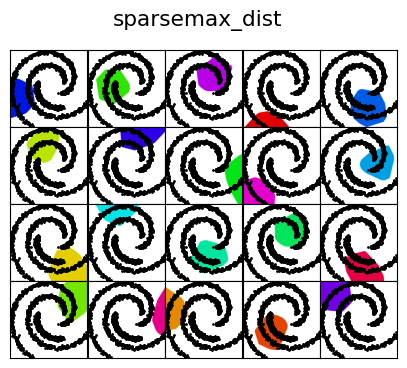

In [ ]:
#show only final receptive fields for all models, data in separate figures, each having 4X5 subplots (one per neuron)
plt.rcParams.update({'font.size': 13})
for i in [1]:
    
    for j in range(len(modeltypes)):
        fig, axs = plt.subplots(4, 5, figsize=(5, 4))
        key_final = modeltypes[j]+"_"+dataname_all[i]+"_"+str(NUMNEURONS)+"neurons_final"
        
        for k in range(NUMNEURONS):
            axs[k//5, k%5].scatter(data_all[i].data[:, 0], data_all[i].data[:, 1], s=1, c='k')
            axs[k//5, k%5].imshow(Rfieldall[key_final][k].max()-Rfieldall[key_final][k], extent=[-2, 2, -2, 2], origin='lower')
            axs[k//5, k%5].set_xticks([])
            axs[k//5, k%5].set_yticks([])
            axs[k//5, k%5].set_xlim(-2, 2)
            axs[k//5, k%5].set_ylim(-2, 2)
            
        fig.suptitle(modeltypes[j])
        # fig.tight_layout()
        fig.subplots_adjust(wspace=0, hspace=0)
        # plt.savefig("./figures/Rfields_"+modeltypes[j]+"_"+dataname_all[i]+".png", dpi=300, bbox_inches='tight')
        plt.show()

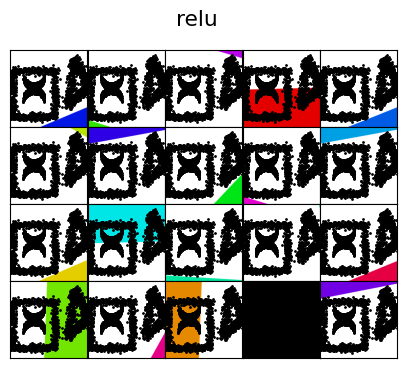

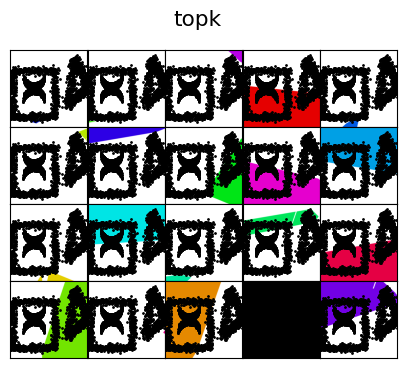

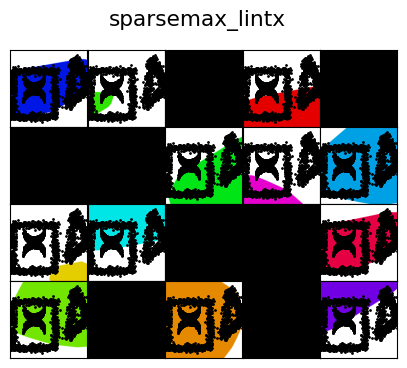

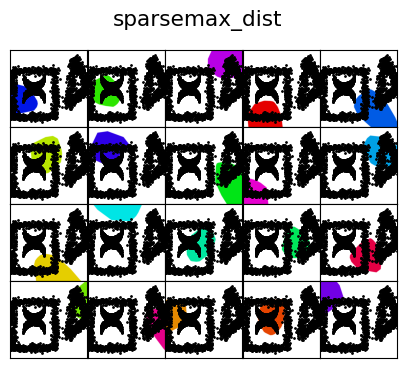

In [ ]:
#show only final receptive fields for all models, data in separate figures, each having 4X5 subplots (one per neuron)
plt.rcParams.update({'font.size': 13})
for i in [2]:
    
    for j in range(len(modeltypes)):
        fig, axs = plt.subplots(4, 5, figsize=(5, 4))
        key_final = modeltypes[j]+"_"+dataname_all[i]+"_"+str(NUMNEURONS)+"neurons_final"
        
        for k in range(NUMNEURONS):
            axs[k//5, k%5].scatter(data_all[i].data[:, 0], data_all[i].data[:, 1], s=1, c='k')
            axs[k//5, k%5].imshow(Rfieldall[key_final][k].max()-Rfieldall[key_final][k], extent=[-2, 2, -2, 2], origin='lower')
            axs[k//5, k%5].set_xticks([])
            axs[k//5, k%5].set_yticks([])
            axs[k//5, k%5].set_xlim(-2, 2)
            axs[k//5, k%5].set_ylim(-2, 2)
            
        fig.suptitle(modeltypes[j])
        # fig.tight_layout()
        fig.subplots_adjust(wspace=0, hspace=0)
        # plt.savefig("./figures/Rfields_"+modeltypes[j]+"_"+dataname_all[i]+".png", dpi=300, bbox_inches='tight')
        plt.show()

In [95]:
#load train and test loss from saved torch files
testlossmseall, testlossregall = {}, {}

for i in range(len(dataname_all)):
    for j in range(len(modeltypes)):
        expt_name = modeltypes[j]+"_"+dataname_all[i]+"_"+str(NUMNEURONS)+"neurons"
        losses = torch.load(f"./experiments/{expt_name}/losses.pt")
        
        testlossmseall[expt_name], testlossregall[expt_name] = losses['testloss_mse'], losses['testloss_reg']

/tmp/ipykernel_2743170/1321577162.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  losses = torch.load(f"./experiments/{expt_name}/losses.pt")


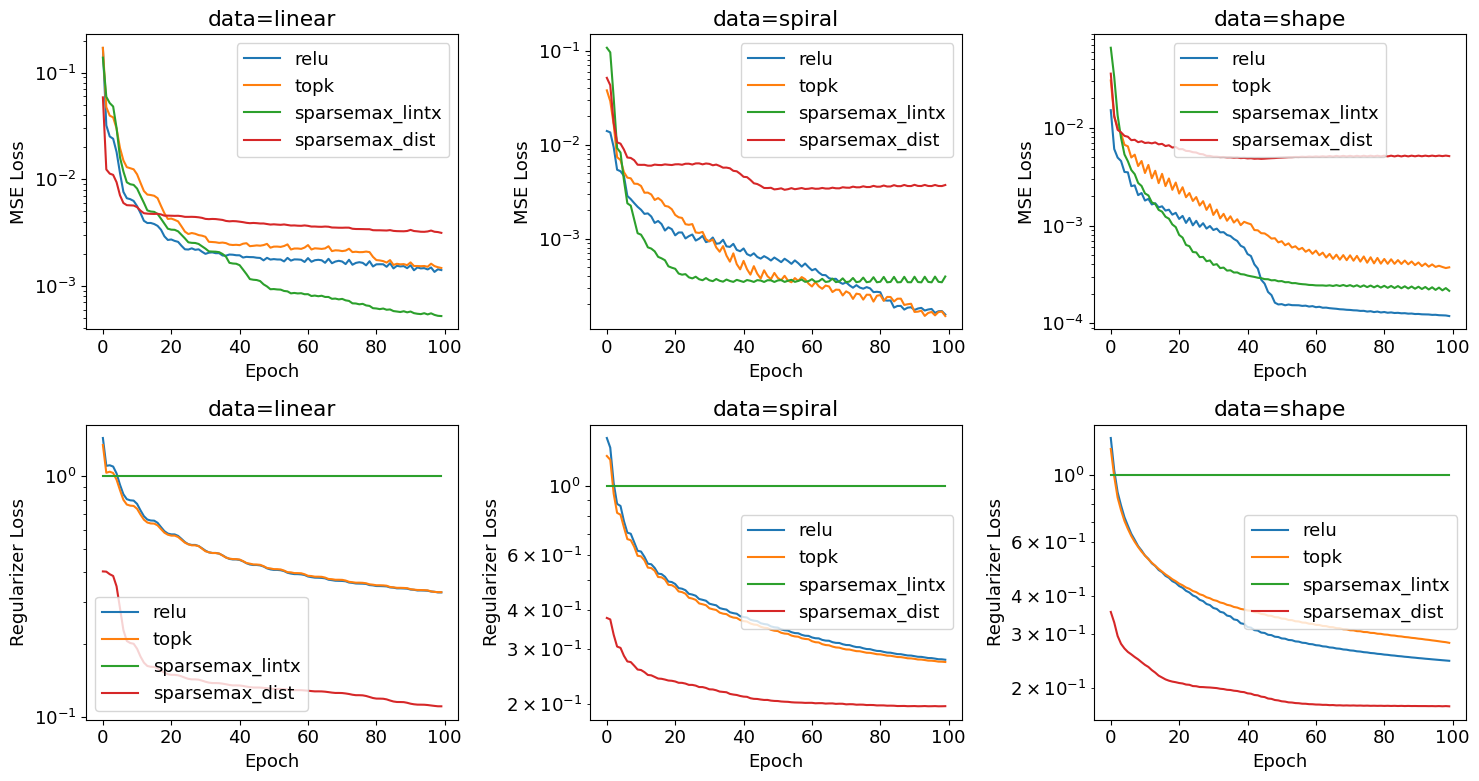

In [ ]:
#make a figure with 2 subplots- one for mse another for reg loss

fig, axs = plt.subplots(2, len(dataname_all), figsize=(5 * len(dataname_all), 8))

for i, dataname in enumerate(dataname_all):
    # Plot MSE loss
    for key, values in testlossmseall.items():
        if dataname in key:
            prefix = key.split('_'+dataname)[0]
            axs[0,i].plot(values, label=prefix)
    axs[0, i].set_title(f'data={dataname}')
    axs[0, i].set_xlabel('Epoch')
    axs[0,i].set_ylabel('MSE Loss')
    axs[0, i].legend()

    # Plot regularization loss
    for key, values in testlossregall.items():
        if dataname in key:
            prefix = key.split('_'+dataname)[0]
            axs[1, i].plot(values, label=prefix)

    axs[1, i].set_title(f'data={dataname}')
    axs[1, i].set_xlabel('Epoch')
    axs[1, i].set_ylabel('Regularizer Loss')
    axs[1, i].legend()
    axs[1, i].set_yscale('log')
    axs[0, i].set_yscale('log')
    # axs[i, 1].set_xscale('log')
    # axs[i, 0].set_xscale('log')
    
    

plt.tight_layout()
# plt.savefig("./figures/losses.png", dpi=300, bbox_inches='tight')
